# **Importing Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Handling Missing Values**

In [ ]:
# Load Data /content/drive/MyDrive/KU-17_B01_Kandy_Uni/data
df = pd.read_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/data/survey.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
print("Missing values per column before filling:")
print(df.isnull().sum())

Missing values per column before filling:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


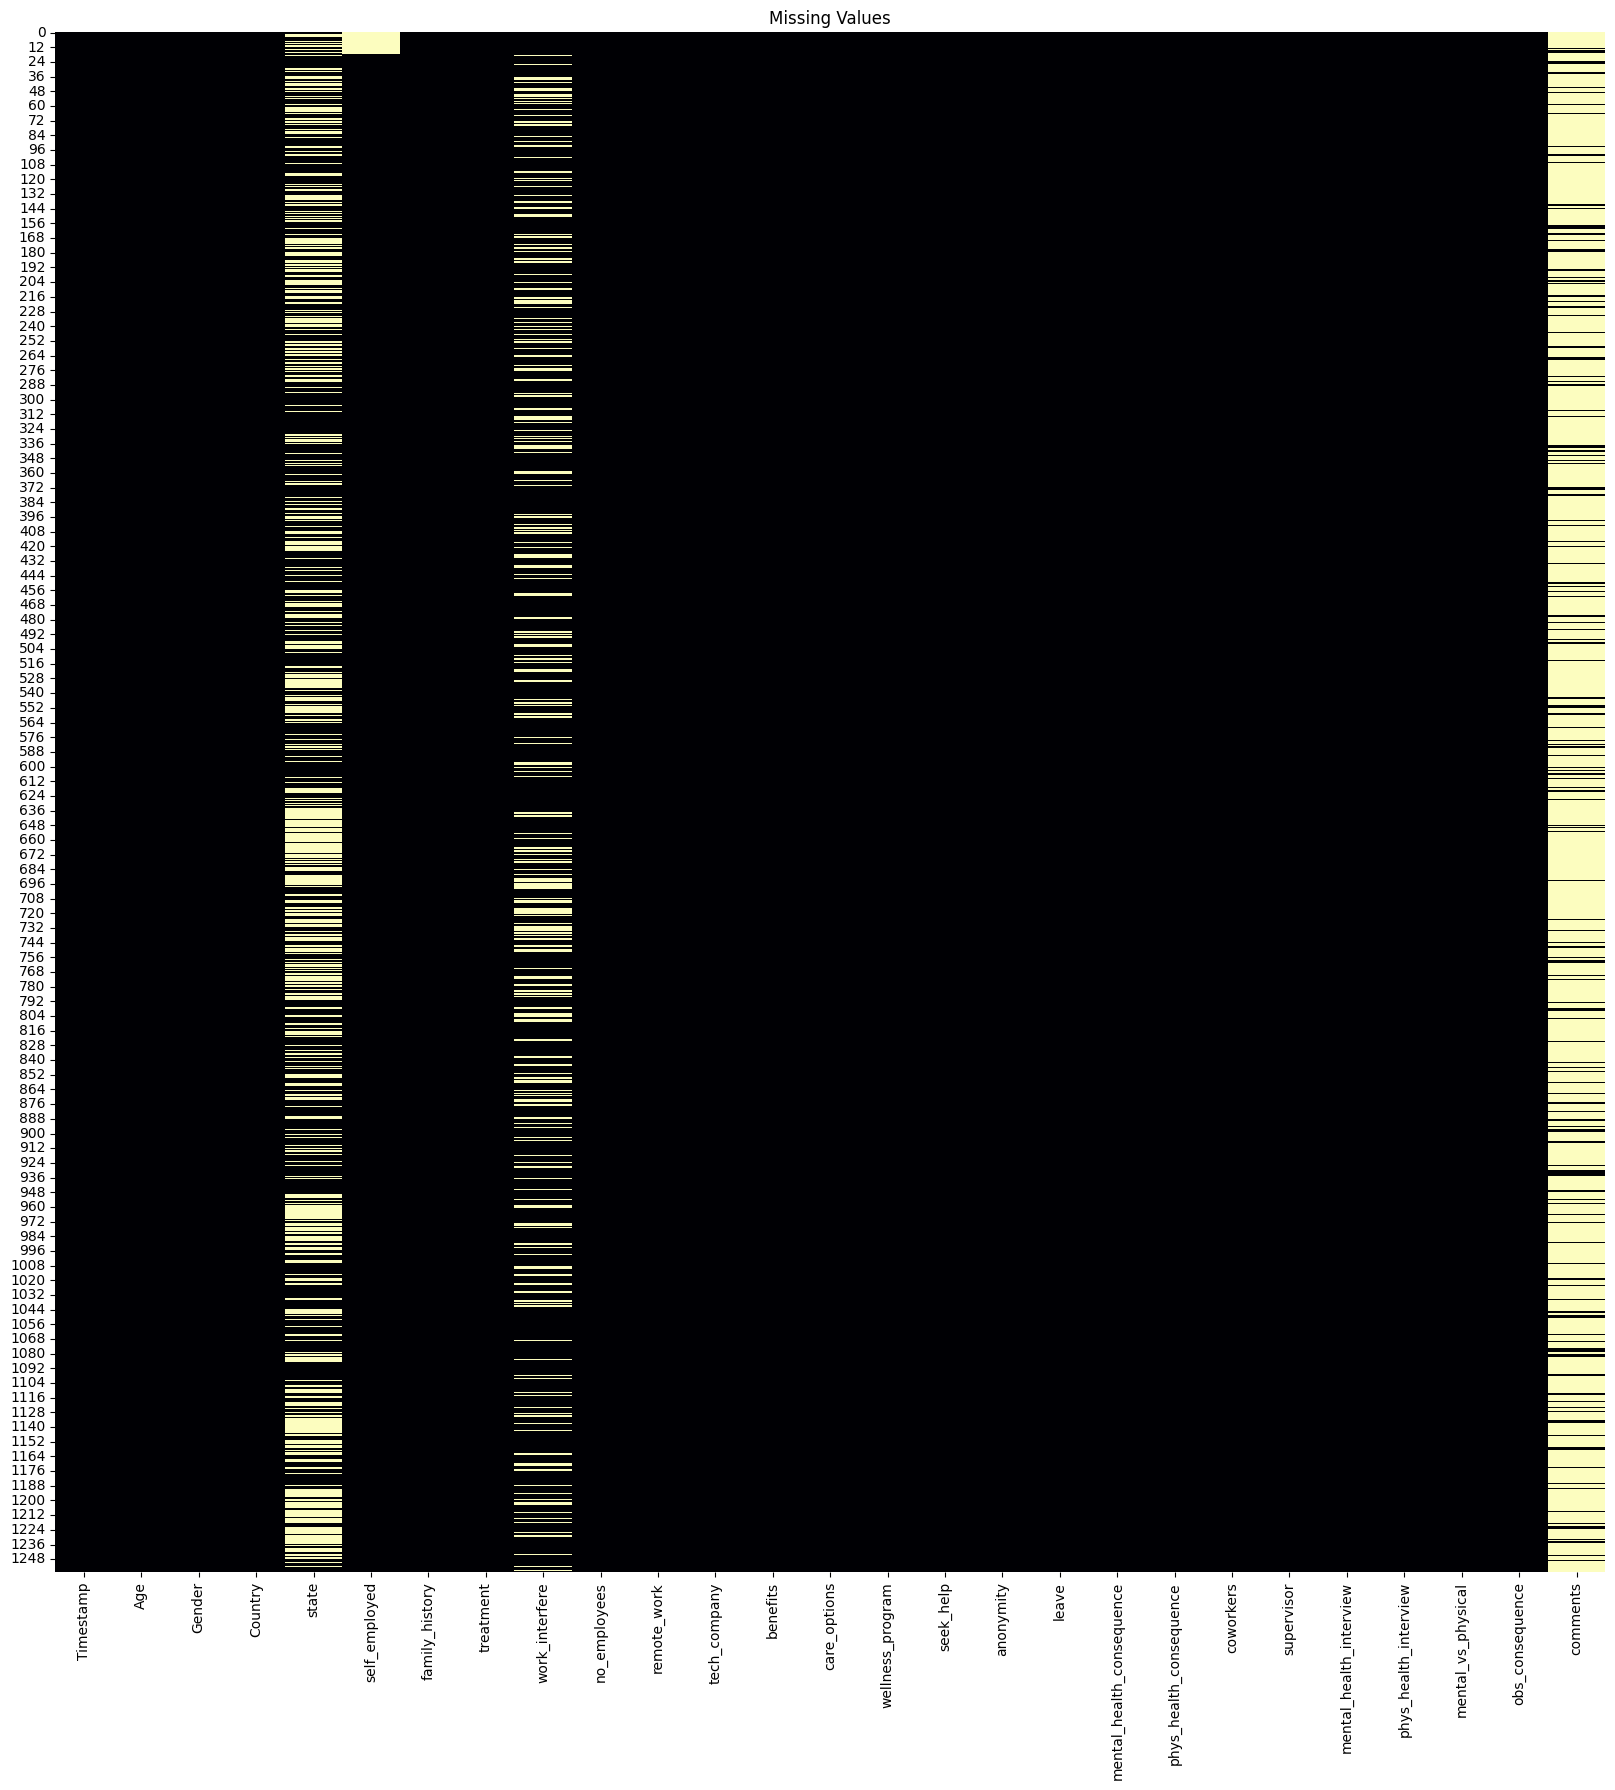

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull(), cbar=False,cmap='magma')
plt.title('Missing Values')
plt.show()

From the missing values heatmap (see image 1), it's clear that 'self_employed', 'state', and 'comments' have a significant number of missing entries, while most other columns are almost complete. This suggests we need to pay special attention to how we handle missing data in these columns, either by filling with a placeholder, dropping, or ignoring them in future analysis.

In [ ]:
# Coerce Age to numeric (invalid strings -> NaN), then impute with median
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
print(f'Filled Age missing values with median: {age_median}')

Filled Age missing values with median: 31.0


In [ ]:
df = df.drop('comments', axis=1)

In [ ]:
df = df.drop('state', axis=1)

In [ ]:
for columns in df.select_dtypes(include = 'object').columns:
  df[columns] = df[columns].fillna('Unknown')

In [ ]:
print("Missing values after filling:")
print(df.isnull().sum())

Missing values after filling:
Timestamp                    0
Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64


In [ ]:
df.to_csv('/content/drive/MyDrive/KU-17_B01_Kandy_Uni/results/outputs/survey_cleaned.csv', index=False)
print('Saved cleaned dataset to data/survey_cleaned.csv')

Saved cleaned dataset to data/survey_cleaned.csv
